In [1]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: D:\IPCV Projects\IM\Scripts\python.exe -m pip install --upgrade pip


In [3]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 325.1 kB/s eta 0:00:06
    --------------------------------------- 0.0/1.8 MB 325.1 kB/s eta 0:00:06
    --------------------------------------- 0.0/1.8 MB 196.9 kB/s eta 0:00:10
   - -------------------------------------- 0.1/1.8 MB 327.3 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.8 MB 364.4 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.8 MB 359.9 kB/s eta 0:00:05
   --- ------------------------------------ 0.2/1.8 MB 426.7 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/1.8 MB 426.7 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/1.8 MB 426.7 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/1.8 MB 426.7 kB/s eta 0:00:04
   ---- -----

In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [13]:
print(cv2.__version__)

4.10.0


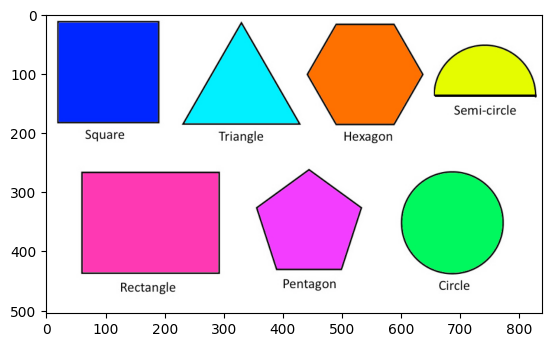

In [14]:
img =cv2.imread(r'D:\IPCV Projects\IM\img2.jpg')
plt.imshow(img)

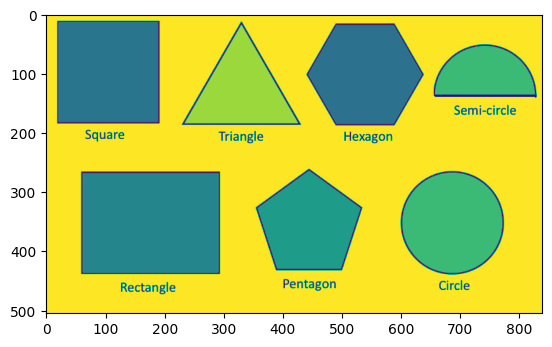

In [15]:
grey = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(grey)

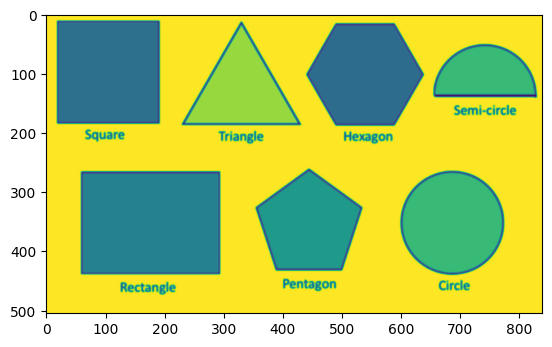

In [16]:
blurred = cv2.GaussianBlur(grey , (5,5), 0)
plt.imshow(blurred)

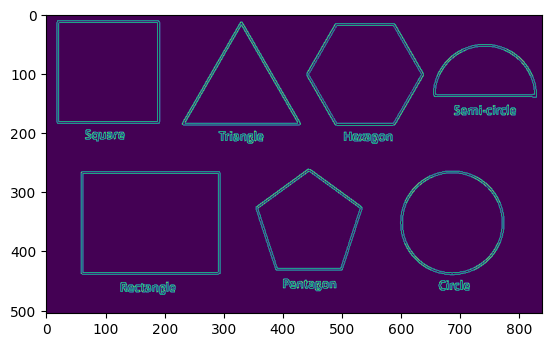

In [17]:
edges = cv2.Canny(blurred, 50 ,150)
plt.imshow(edges)

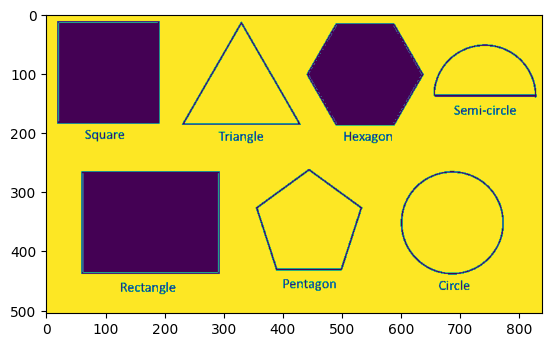

In [18]:
_, thresh = cv2.threshold(grey, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)

In [20]:
#find contours in the binary timage
contours,_ = cv2.findContours(thresh,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [21]:
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

array([[[119, 119, 119],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [119, 119, 119]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[122, 122, 122],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [122, 122, 122]]

In [19]:
import cv2

def find_triangles(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and help contour detection
    blurred = cv2.GaussianBlur(grey, (7, 7), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a copy of the original image to draw on
    img_with_boxes = img.copy()

    # Iterate through the contours
    for contour in contours:
        # Approximate the contour to a polygon
        epsilon = 0.04 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # If the polygon has 3 vertices, it's a triangle
        if len(approx) == 3:
            # Draw a bounding box around the triangle (in red)
            x, y, w, h = cv2.boundingRect(approx)
            cv2.rectangle(img_with_boxes, (x, y), (x + w, y + h), (0, 0, 255), 2)

            # Optionally, draw the contour to visualize the triangle
            cv2.drawContours(img_with_boxes, [approx], 0, (0, 255, 0), 2)

    # Display the result 
    cv2.imshow('Triangles with Bounding Boxes', img_with_boxes)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [24]:
find_triangles(r'D:\IPCV Projects\IM\img2.jpg')

In [25]:
def find_square(image_path, resize_factor=1.0):
    img = cv2.imread(image_path)
    
    # Resize the image if a resize_factor is provided
    if resize_factor != 1.0:
        img = cv2.resize(img, None, fx=resize_factor, fy=resize_factor)

    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(grey, (7, 7), 0)
    edges = cv2.Canny(blurred, 30, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
        if len(approx) == 4 and cv2.isContourConvex(approx):
            # Check if opposite sides are approximately parallel
            side1 = np.linalg.norm(approx[0] - approx[1])
            side2 = np.linalg.norm(approx[2] - approx[3])
            side3 = np.linalg.norm(approx[1] - approx[2])
            side4 = np.linalg.norm(approx[3] - approx[0])

            diagonal1 = np.linalg.norm(approx[0] - approx[2])
            diagonal2 = np.linalg.norm(approx[1] - approx[3])

            # Check for right angles and parallel sides
            if (
                abs(side1 - side3) < 0.1 * side1
                and abs(side2 - side4) < 0.1 * side2
                and abs(diagonal1 - diagonal2) < 0.1 * diagonal1
            ):
                cv2.drawContours(img, [approx], 0, (0, 255, 0), 2)

    cv2.imshow('Square with Bounding Boxes', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage with resizing by a factor of 0.5 (you can adjust as needed)
image_path = r'D:\IPCV Projects\IM\img2.jpg'
find_square(image_path, resize_factor=0.5)

In [26]:
def find_rectangles(image_path, resize_factor=1.0):
    img = cv2.imread(image_path)
    
    # Resize the image if a resize_factor is provided
    if resize_factor != 1.0:
        img = cv2.resize(img, None, fx=resize_factor, fy=resize_factor)

    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(grey, (7, 7), 0)
    edges = cv2.Canny(blurred, 30, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
        if len(approx) == 4 and cv2.isContourConvex(approx):
            # Check if opposite sides are approximately parallel
            side1 = np.linalg.norm(approx[0] - approx[1])
            side2 = np.linalg.norm(approx[1] - approx[2])
            side3 = np.linalg.norm(approx[2] - approx[3])
            side4 = np.linalg.norm(approx[3] - approx[0])

            # Check for right angles and non-equal sides
            if (
                abs(side1 - side3) < 0.2 * side1
                and abs(side2 - side4) < 0.2 * side2
                and not np.isclose(side1, side2)  # Exclude squares
            ):
                cv2.drawContours(img, [approx], 0, (0, 255, 0), 2)

    cv2.imshow('Rectangles with Bounding Boxes', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage with resizing by a factor of 0.5 (you can adjust as needed)
image_path = r'D:\IPCV Projects\IM\img2.jpg'
find_rectangles(image_path, resize_factor=0.5)

In [27]:
def find_circles(image_path, resize_factor=1.0):
    img = cv2.imread(image_path)

    # Resize the image if a resize_factor is provided
    if resize_factor != 1.0:
        img = cv2.resize(img, None, fx=resize_factor, fy=resize_factor)

    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(grey, (7, 7), 0)
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=50,
        param1=50,  # Adjust as needed
        param2=30,  # Adjust as needed
        minRadius=10,
        maxRadius=50
    )

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            radius = i[2]

            # Create a circular mask
            mask = np.zeros_like(grey)
            cv2.circle(mask, center, radius, 255, thickness=cv2.FILLED)

            # Find contours within the circular mask
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Calculate circularity by comparing the area of the contour to the area of the circle
            if len(contours) > 0:
                contour_area = cv2.contourArea(contours[0])
                circle_area = np.pi * radius**2

                # Set a circularity threshold (adjust as needed)
                circularity_threshold = 0.85

                if contour_area / circle_area > circularity_threshold:
                    # draw the outer circle
                    cv2.circle(img, center, radius, (0, 255, 0), 2)
                    # draw the center of the circle
                    cv2.circle(img, center, 2, (0, 0, 255), 3)

    cv2.imshow('Full Circles with Bounding Boxes', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage with resizing by a factor of 0.5 (you can adjust as needed)
image_path = r'D:\IPCV Projects\IM\img2.jpg'
find_full_circles(image_path, resize_factor=0.5)

In [23]:
import cv2
import numpy as np

def count_shapes(image_path):
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and help contour detection
    blurred = cv2.GaussianBlur(grey, (7, 7), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 30, 150)

    # Find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize counters
    triangle_count = 0
    square_count = 0
    circle_count = 0

    # Iterate through the contours
    for contour in contours:
        # Approximate the contour to a polygon
        epsilon = 0.04 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # If the polygon has 3 vertices, it's a triangle
        if len(approx) == 3:
            triangle_count += 1
        elif len(approx) == 4 and cv2.isContourConvex(approx):
            # Check if it's a square
            side1 = np.linalg.norm(approx[0] - approx[1])
            side2 = np.linalg.norm(approx[2] - approx[3])
            side3 = np.linalg.norm(approx[1] - approx[2])
            side4 = np.linalg.norm(approx[3] - approx[0])

            diagonal1 = np.linalg.norm(approx[0] - approx[2])
            diagonal2 = np.linalg.norm(approx[1] - approx[3])

            if (
                abs(side1 - side3) < 0.1 * side1
                and abs(side2 - side4) < 0.1 * side2
                and abs(diagonal1 - diagonal2) < 0.1 * diagonal1
            ):
                square_count += 1
        else:
            # Check if it's a circle
            perimeter = cv2.arcLength(contour, True)
            if perimeter > 0:
                circularity = 4 * np.pi * cv2.contourArea(contour) / (perimeter ** 2)
                if circularity > 0.85:
                    circle_count += 1

    # Print the counts
    print(f'Triangles: {triangle_count}')
    print(f'Squares: {square_count}')
    print(f'Circles: {circle_count}')

# Example usage
image_path = r'D:\IPCV Projects\IM\img2.jpg'
count_shapes(image_path)


Triangles: 1
Squares: 1
Circles: 2
